#Required Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np

#Datasets

In [5]:
# Load datasets
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content//test.csv")
df_social_media_train = pd.read_csv("/content//social_media_train.csv")
df_social_media_test = pd.read_csv("/content//social_media_test.csv")
df_fake_account = pd.read_csv("/content//fake_account__data_dict.csv")

#Data Cleaning

In [27]:
# Data Cleaning
df_social_media_train.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df_social_media_test.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

binary_columns = ["profile_pic", "sim_name_username", "extern_url", "private"]
for col in binary_columns:
    df_social_media_train[col] = df_social_media_train[col].map({"Yes": 1, "No": 0, "Full match": 1})
    df_social_media_test[col] = df_social_media_test[col].map({"Yes": 1, "No": 0, "Full match": 1})

df_social_media_train.fillna(0, inplace=True)
df_social_media_test.fillna(0, inplace=True)

Feature Selection

In [28]:
# Feature Selection
X_train = df_social_media_train.drop(columns=["fake"])
y_train = df_social_media_train["fake"]
X_test = df_social_media_test.drop(columns=["fake"])
y_test = df_social_media_test["fake"]


Standardization

In [29]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#Logistic Regression Model

In [30]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_pred_log_proba = log_model.predict_proba(X_test_scaled)[:, 1]
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"🔹 Logistic Regression Accuracy: {log_accuracy:.4f}")
print("\n🔹 Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Accuracy: 0.8333

🔹 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        60
           1       0.83      0.83      0.83        60

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



#Random Forest Model

In [31]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"🔹 Random Forest Accuracy: {rf_accuracy:.4f}")
print("\n🔹 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest Accuracy: 0.9500

🔹 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.92      0.98      0.95        60

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



#Confusion Matrices

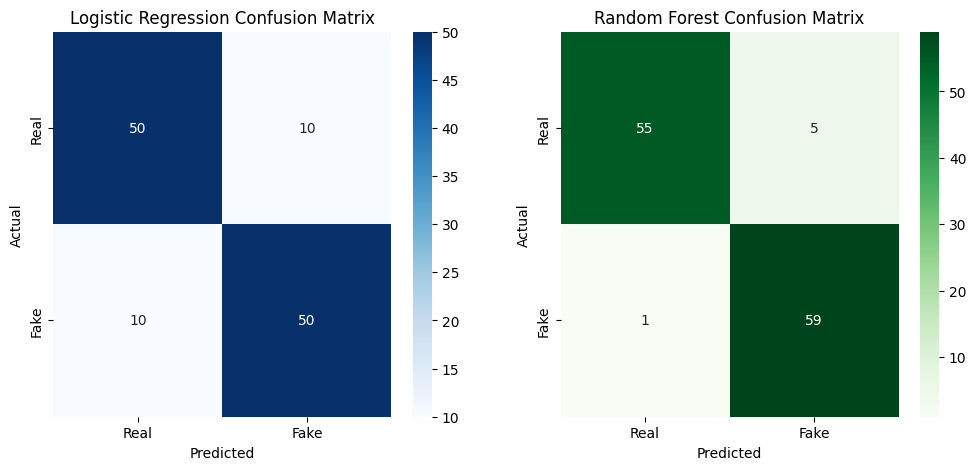

In [33]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'], ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

#Accuracy Comparison

<ipython-input-34-443a113302de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


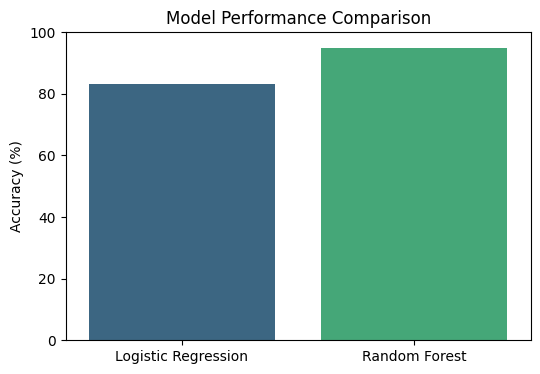

In [34]:
# Accuracy Comparison
models = ["Logistic Regression", "Random Forest"]
accuracies = [log_accuracy * 100, rf_accuracy * 100]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.title("Model Performance Comparison")
plt.show()

#Feature Importance for Random Forest

<ipython-input-35-6b450624b8ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx][:10], y=np.array(features)[sorted_idx][:10], palette='coolwarm')


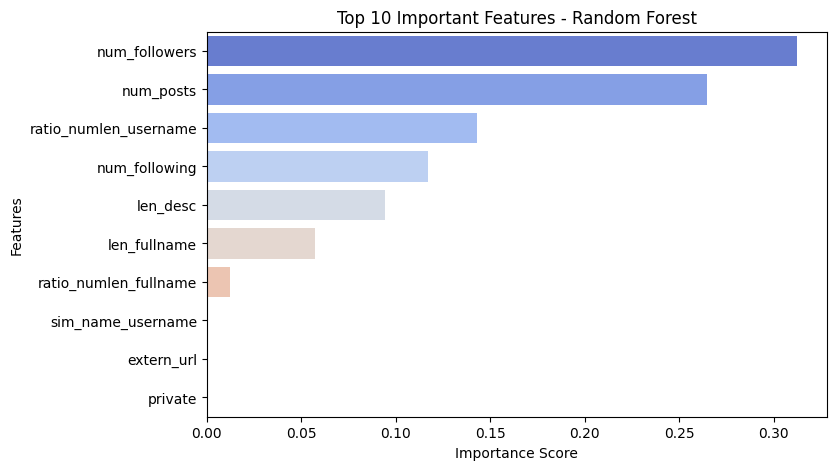

In [35]:
# Feature Importance for Random Forest
feature_importance = rf_model.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance[sorted_idx][:10], y=np.array(features)[sorted_idx][:10], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features - Random Forest")
plt.show()

#ROC Curve

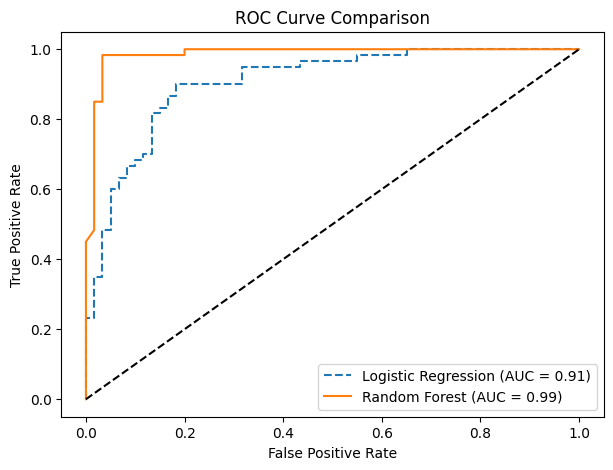

In [36]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()